In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [78]:
train = pd.read_csv('train.csv')

In [79]:
# occupation, educationlevel, maritalstatus, merchantid, transaction type
train = train.dropna()

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10923 entries, 0 to 10965
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    10923 non-null  int64  
 1   UserID               10923 non-null  int64  
 2   Age                  10923 non-null  int64  
 3   Gender               10923 non-null  object 
 4   Occupation           10923 non-null  object 
 5   EducationLevel       10923 non-null  object 
 6   MaritalStatus        10923 non-null  object 
 7   NumDependents        10923 non-null  int64  
 8   Income               10923 non-null  object 
 9   Expenditure          10923 non-null  object 
 10  GiftsTransaction     10923 non-null  object 
 11  TransactionDate      10923 non-null  object 
 12  TransactionTime      10923 non-null  object 
 13  TransactionAmount    10923 non-null  object 
 14  MerchantID           10923 non-null  object 
 15  TransactionType      10923 non-null 

In [81]:
# email 
train['Domain'] = train.EmailDomain.str.split('@').str[1].str.split('.').str[0]
#train = train.drop('EmailDomain', axis=1)
train

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud,Domain
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1,disposable
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1,gmail
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0,gmail
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1,tempmail
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0,gmail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,11284,3632,25,Male,Unemployed,High School,Single,3,64488.68 AUD,AU$ 21813.53,...,Purchase,Canberra,Mobile,-37.020100,144.964600,rpalmer@outlook.com,False,110,0,outlook
10962,11964,3925,-18,Female,Professional,High School,Married,2,80403.31 AUD,AU$ 63429.08,...,Purchase,Hobart,iphone 15,-37.020100,144.964600,rcruz@yahoo.com,False,91,1,yahoo
10963,5390,4811,22,Male,Unemployed,High School,Widowed,3,AU$ 29048.42,18806.31 AUD,...,Purchase,canberra,mob,-31.840233,145.612793,dawnmendoza@yahoo.com,True,84,0,yahoo
10964,860,1110,29,Female,Student,High School,Divorced,4,28654.66 AUD,AU$ 9748.53,...,Purchase,Canberra,Mobile,-37.020100,144.964600,miranda86@disposable.com,False,62,1,disposable


In [82]:
replacement = {
    'Adelaide': 'Adelaide',
    'adl': 'Adelaide',
    'Adelaide City': 'Adelaide',
    'Adl': 'Adelaide',
    'Bne': 'Brisbane',
    'BNE': 'Brisbane',
    'brisbane': 'Brisbane',
    'Brisbane': 'Brisbane',
    'canberra': 'Canberra',
    'Canberra': 'Canberra',
    'CBR': 'Canberra',
    'Cbr': 'Canberra',
    'c': 'Canberra',
    'darwin': 'Darwin',
    'Darwin': 'Darwin',
    'Drw': 'Darwin',
    'DRW': 'Darwin',
    'Hbt': 'Hobart',
    'HBT': 'Hobart',
    'hobart': 'Hobart',
    'Hobart': 'Hobart',
    'Mel': 'Melbourne',
    'melb': 'Melbourne',
    'Melb': 'Melbourne',
    'melbourne': 'Melbourne',
    'Melbourne': 'Melbourne',
    'Melburne': 'Melbourne',
    'Melburn': 'Melbourne',
    'MLB': 'Melbourne',
    'perth': 'Perth',
    'Perth': 'Perth',
    'PTH': 'Perth',
    'Pth': 'Perth',
    'Syd': 'Sydney',
    'Sydney': 'Sydney',
    'SYD': 'Sydney',
    'sydney': 'Sydney',
}

In [83]:
train['TransactionLocation'] = train['TransactionLocation'].replace(replacement)

In [84]:
replacement_for_device = {
    'android': 'Mobile',
     'galaxys7': 'Mobile',
      'iphone 15': 'Mobile',
       'mob': 'Mobile',
        'smartphone': 'Mobile',
         'Mobile': 'Mobile',
}

In [85]:
train['DeviceType'] = train['DeviceType'].replace(replacement_for_device)

In [86]:
gender_mapping = {
    'fem': 'Female',
    'Female': 'Female',
    'she': 'Female',
    'woman': 'Female',
    'he': 'Male',
    'man': 'Male',
    'Male': 'Male',
    'isnotfemale': 'Male',
    'isnotmale': 'Female',
}

train['Gender'] = train['Gender'].map(gender_mapping).fillna('Other')

In [87]:
def standard_time(time_str):
    try:
        if 'AM' in time_str or 'PM' in time_str:
            return pd.to_datetime(time_str, format='%I:%M:%S %p').strftime('%H:%M:%S')
        
        return pd.to_datetime(time_str, format='%H:%M:%S').strftime('%H:%M:%S')
    
    except (ValueError, TypeError):
        try:
            parts = time_str.split('/')
            corrected_time = f'{parts[0]}:{parts[1]}:{parts[2]}'
            return pd.to_datetime(corrected_time, format='%H:%M:%S').strftime('%H:%M:%S')
        except Exception:
            return 'NOPES'

def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

train['TransactionTime'] = train['TransactionTime'].apply(standard_time)
# apply categorize_time function to TransactionTime column
train['TransactionTime'] = pd.to_datetime(train['TransactionTime'], format='%H:%M:%S').dt.hour
train['TransactionTime'] = train['TransactionTime'].apply(categorize_time)

train['TransactionDate'] = pd.to_datetime(train['TransactionDate'], dayfirst=True)

train['date'] = train['TransactionDate'].dt.day   
train['Month'] = train['TransactionDate'].dt.month  

train['weekday'] = train['TransactionDate'].dt.day_name()

In [88]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority')
X_rus, y_rus = rus.fit_resample(train.drop(columns=['IsFraud']), train['IsFraud'])
train_df = pd.concat([X_rus, y_rus], axis=1)

In [63]:
def viz_cat_var(var_name):
    grouped_data = train_df.groupby([var_name, 'IsFraud']).size().reset_index(name='count')

    # visualise
    plt.figure(figsize=(10,6))
    sns.barplot(x=var_name, y='count', hue='IsFraud', data=grouped_data)

    plt.title(f'{var_name} vs IsFraud Count', fontsize=16)
    plt.xlabel(var_name, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    plt.show()

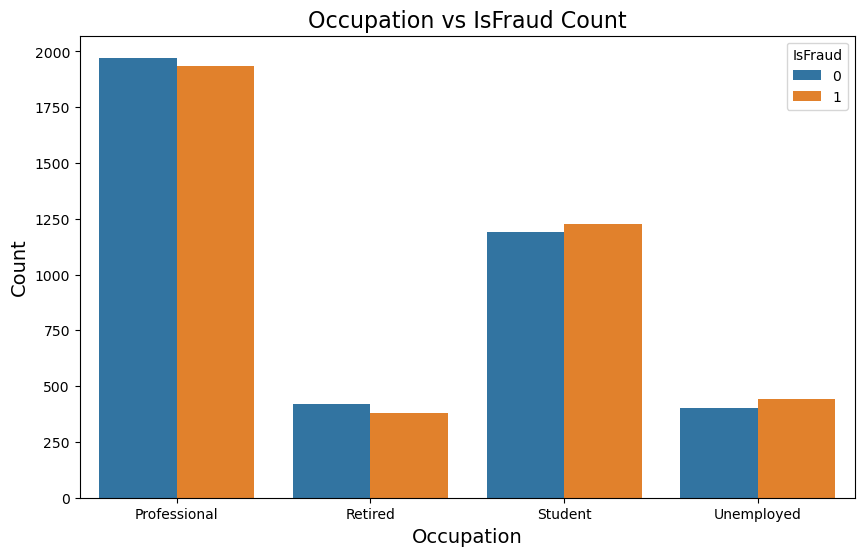

In [26]:
viz_cat_var('Occupation') # -> unemployed and student more likely to be fraudulent?

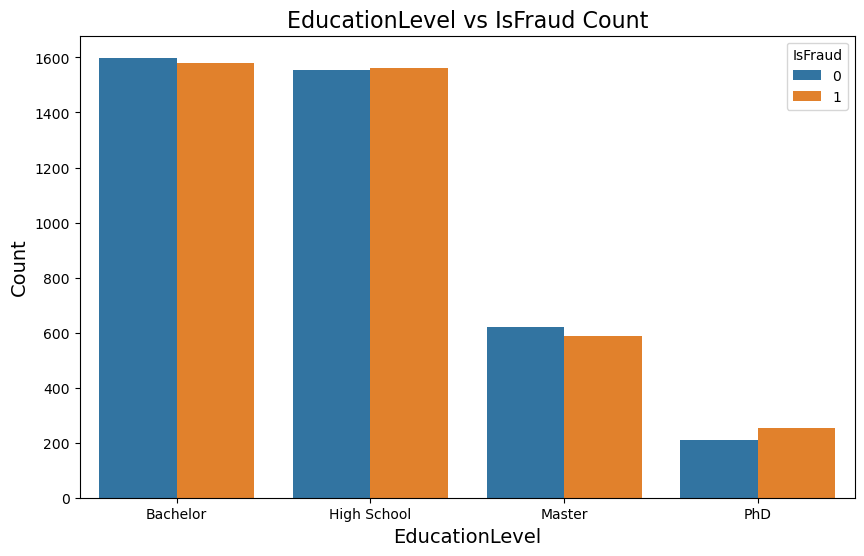

In [27]:
viz_cat_var('EducationLevel') #PhD?

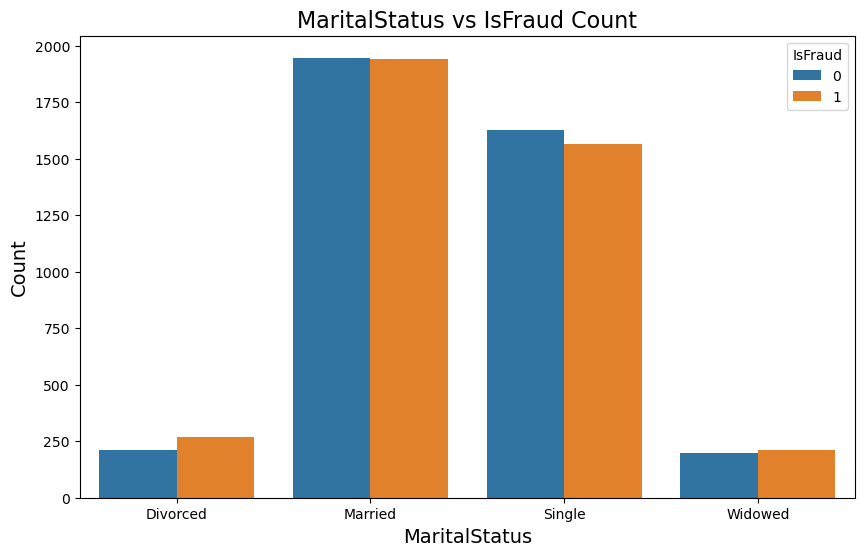

In [28]:
viz_cat_var('MaritalStatus') #-> divorced and widowed?

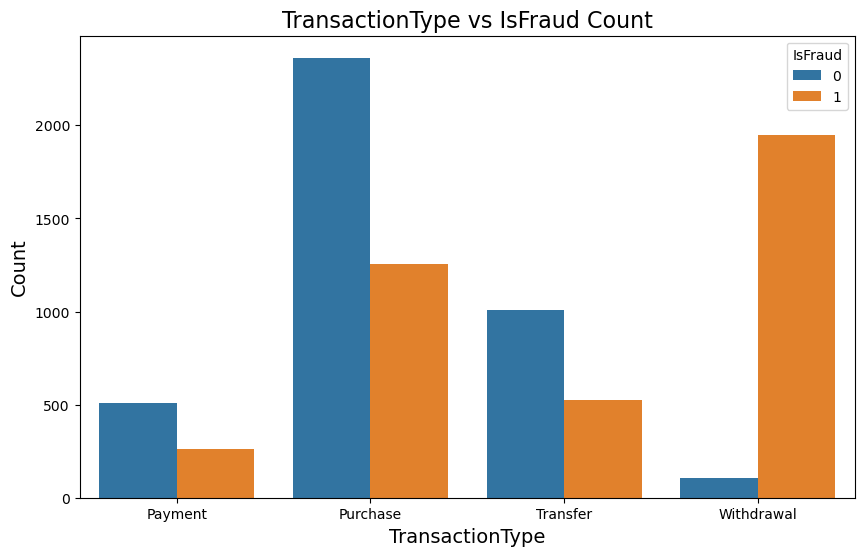

In [29]:
viz_cat_var('TransactionType') # -> withdrawal!!!

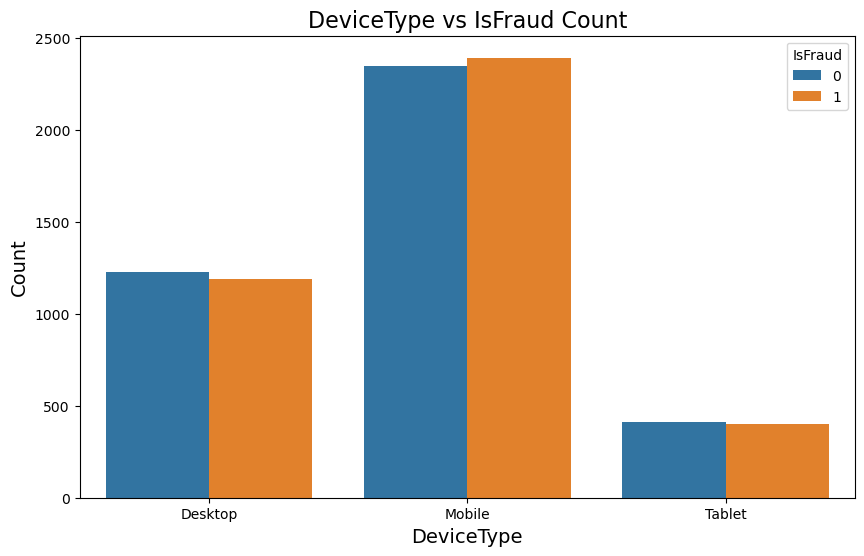

In [30]:
viz_cat_var('DeviceType') #mobile?

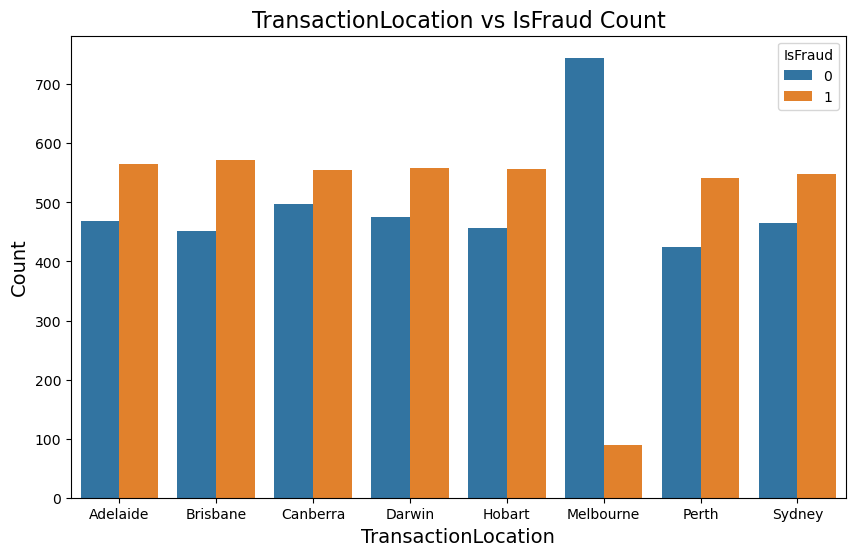

In [31]:
viz_cat_var('TransactionLocation') #if location is melbourne -> less likely to have fraudulent activities?

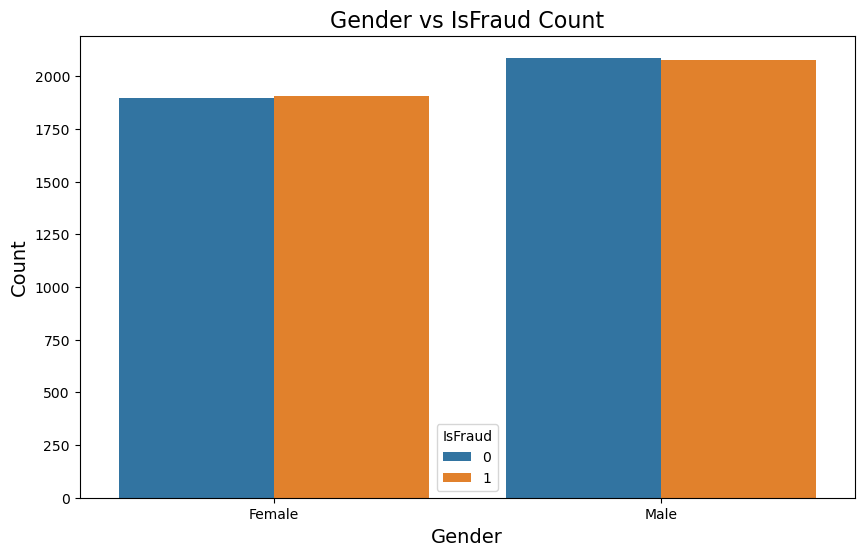

In [46]:
viz_cat_var('Gender')

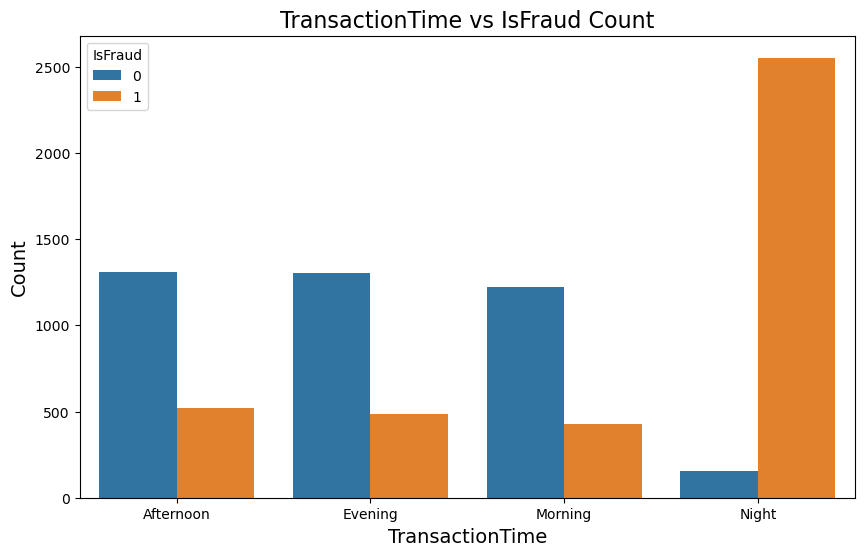

In [89]:
viz_cat_var('TransactionTime')

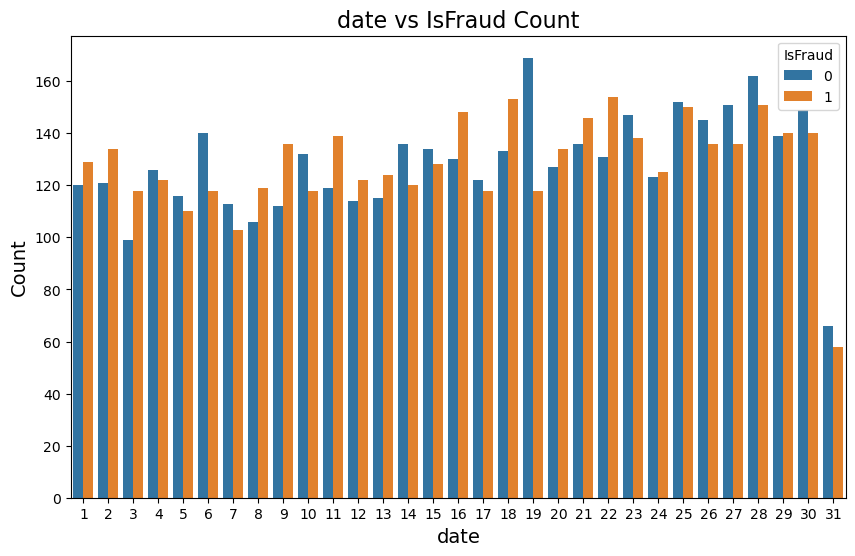

In [66]:
viz_cat_var('date')

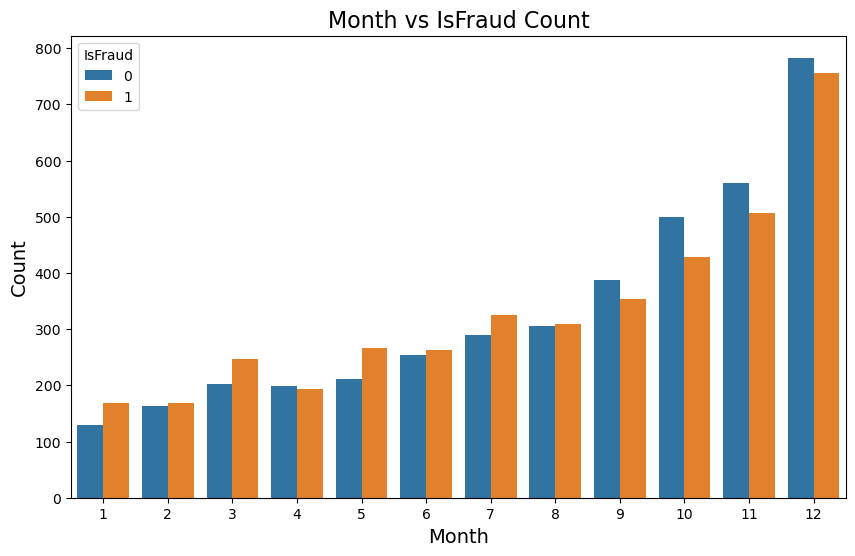

In [67]:
viz_cat_var('Month')

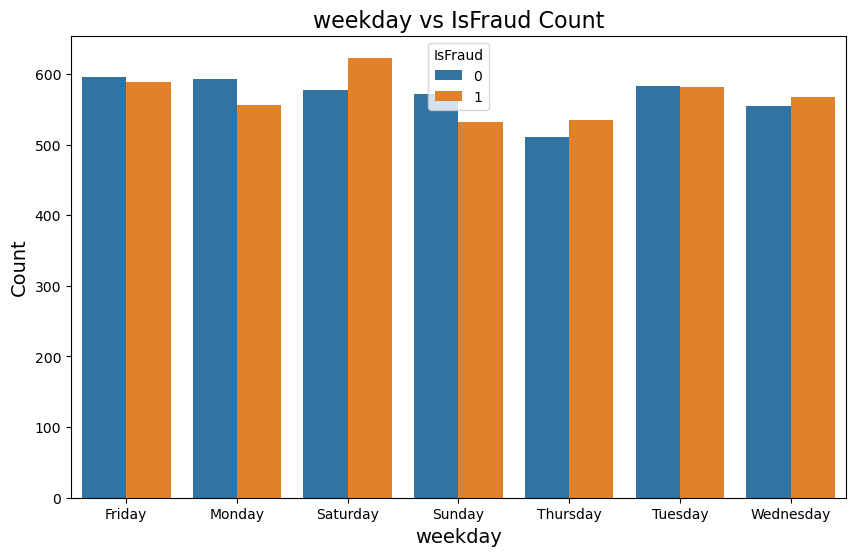

In [69]:
viz_cat_var('weekday')

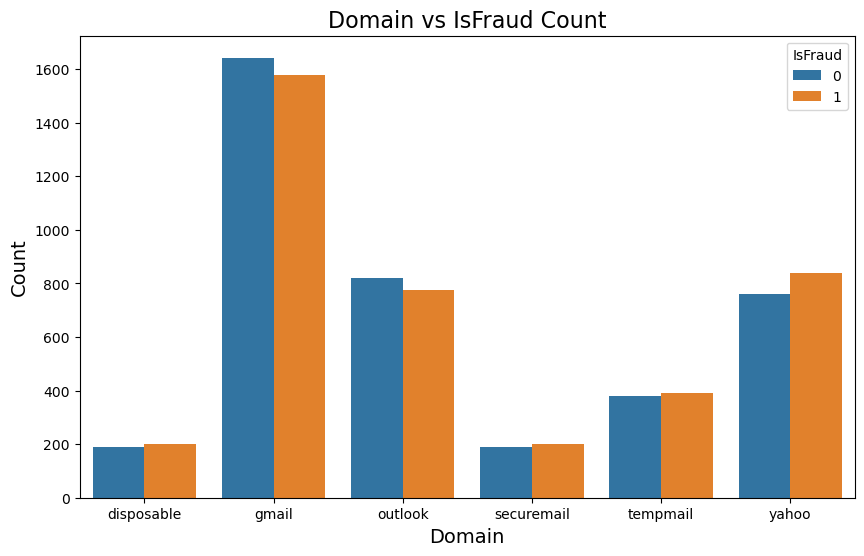

In [71]:
viz_cat_var('Domain')

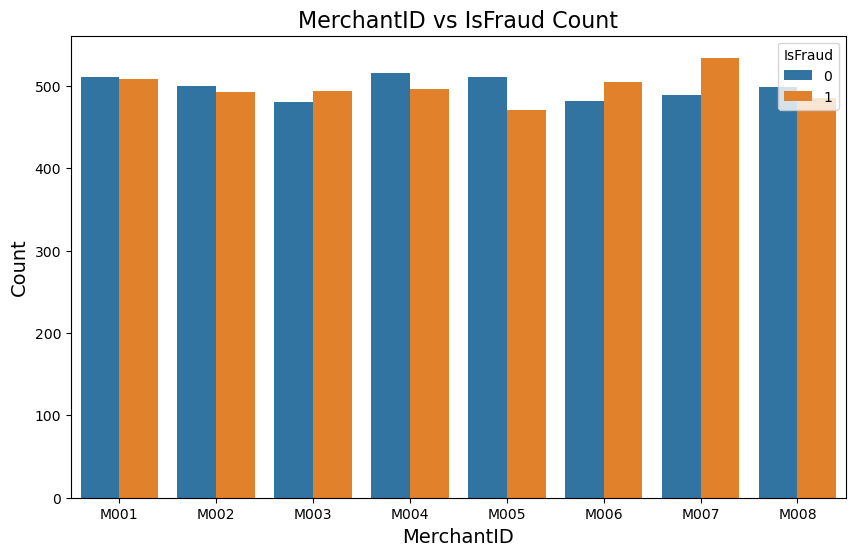

In [72]:
viz_cat_var('MerchantID')

In [47]:
melb = train_df[train_df['TransactionLocation']=='Melbourne']
melb

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,Domain,IsFraud
1,9577,1541,39,Male,Student,PhD,Married,0,49343.77 AUD,AU$ 22265.72,...,Transfer,Melbourne,Desktop,-37.020100,144.964600,sshort@gmail.com,False,20,gmail,0
2,12966,852,42,Female,Professional,Bachelor,Single,2,AU$ 74918.41,AU$ 29873.25,...,Purchase,Melbourne,Mobile,-31.840233,145.612793,billy47@tempmail.com,False,82,tempmail,0
3,9744,2484,27,Male,Professional,High School,Single,2,AU$ 33098.95,AU$ 16785.9,...,Payment,Melbourne,Desktop,-31.840233,145.612793,gregory19@disposable.com,False,15,disposable,0
5,15258,206,60,Female,Student,Bachelor,Divorced,2,166460.9 AUD,294841.02 AED,...,Withdrawal,Melbourne,Mobile,-37.020100,144.964600,moyerkyle@gmail.com,True,35,gmail,0
6,2685,2721,29000,Male,Professional,High School,Single,3,138213.56 AUD,49770.22 AUD,...,Purchase,Melbourne,Desktop,-20.917574,142.702789,christina26@gmail.com,False,2,gmail,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,4142,4967,31,Male,Professional,High School,Married,3,AU$ 48056.77,28562.54 AUD,...,Withdrawal,Melbourne,Mobile,-20.917574,142.702789,jerry69@tempmail.com,True,27,tempmail,1
7873,4642,3117,30,Male,Professional,Master,Married,4,AU$ 58067.76,AU$ 34841.82,...,Withdrawal,Melbourne,Desktop,-20.917574,142.702789,phendrix@outlook.com,False,61,outlook,1
7885,5592,3587,40,Female,Professional,Bachelor,Married,2,AU$ 45786.27,AU$ 25591.6,...,Withdrawal,Melbourne,Mobile,-31.840233,145.612793,jeffjones@disposable.com,True,55,disposable,1
7909,5855,495,29000,Male,Professional,PhD,Widowed,1,AU$ 53320.51,AU$ 18175.18,...,Withdrawal,Melbourne,Tablet,-31.840233,145.612793,nwright@yahoo.com,False,117,yahoo,1


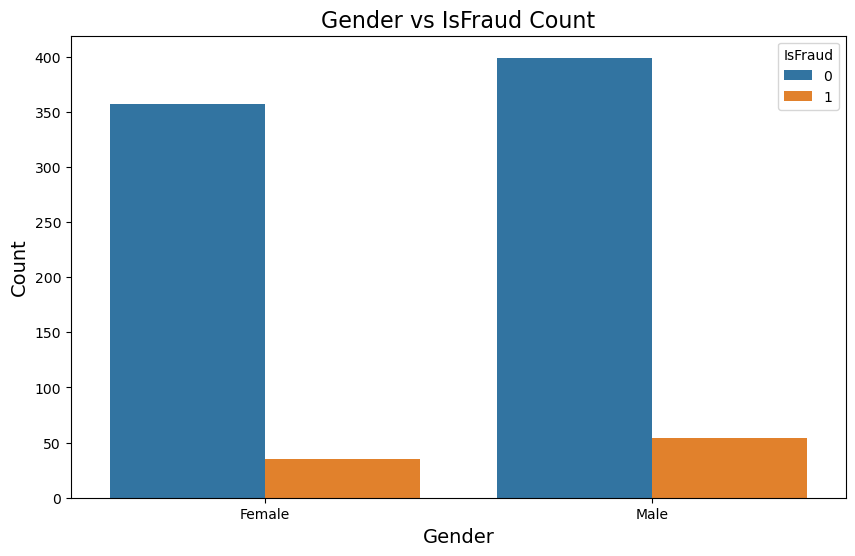

In [48]:
grouped_data = melb.groupby(['Gender', 'IsFraud']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='count', hue='IsFraud', data=grouped_data)

plt.title('Gender vs IsFraud Count', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

In [40]:
# encoding
# Categorical columns
categorical_columns = ['Occupation', 'EducationLevel', 'MaritalStatus', 'TransactionType', 'Email']

# Initialize OneHotEncoder with sparse output for efficiency
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
one_hot_encoded_sparse = encoder.fit_transform(train[categorical_columns])

# Convert the sparse matrix to a DataFrame with the appropriate column names
one_hot_encoded_df = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_sparse, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
train = pd.concat([train.drop(categorical_columns, axis=1).reset_index(drop=True), one_hot_encoded_df.reset_index(drop=True)], axis=1)

In [41]:
train

,TransactionNumber,UserID,Age,Gender,NumDependents,Income,Expenditure,GiftsTransaction,TransactionDate,TransactionTime,...,TransactionType_Payment,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,Email_disposable,Email_gmail,Email_outlook,Email_securemail,Email_tempmail,Email_yahoo
0,8765,70,37,Female,3,28884.43 AUD,14610.61 AUD,£ 1050.01,2023-03-12,12:25:57,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,9645,3386,34,Male,4,AU$ 54919.07,39169.49 AUD,£ 4969.71,2023-03-05,18:27:24,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1145,2971,25,Male,2,AU$ 74728.57,55873.76 AUD,£ 1149.85,2023-11-10,17:16:56,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,15308,2925,25,Male,3,AU$ 55712.62,AED 89649.04,AU$ 4335.7,2023-10-07,00/34/17,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,14967,2339,38,Male,4,53004.7 AUD,AED 43601.02,4763.48 AUD,2023-09-22,06:40:08 PM,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,11284,3632,25,Male,3,64488.68 AUD,AU$ 21813.53,2744.53 GBP,2023-06-04,23:02:18,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10919,11964,3925,-18,Female,2,80403.31 AUD,AU$ 63429.08,£ 191.21,2023-05-24,02:34:24 AM,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10920,5390,4811,22,Male,3,AU$ 29048.42,18806.31 AUD,51.03 GBP,2023-12-26,09:42:49,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10921,860,1110,29,Female,4,28654.66 AUD,AU$ 9748.53,£ 1179.41,2023-07-16,05:24:17 AM,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
